# Task 2
* Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

## About the Dataset
The sinking of Titanic is one of the most notorious shipwrecks in the history. In 1912, during her voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.

### Dataset Overview
The Titanic dataset contains 891 entries with 12 columns:

1) `PassengerId`: Unique ID for each passenger.
2) `Survived`: Survival status (0 = No, 1 = Yes).
3) `Pclass`: Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd).
4) `Name`: Name of the passenger.
5) `Sex`: Gender of the passenger.
6) `Age`: Age of the passenger.
7) `SibSp`: Number of siblings/spouses aboard the Titanic.
8) `Parch`: Number of parents/children aboard the Titanic.
9) `Ticket`: Ticket number.
10) `Fare`: Fare paid by the passenger.
11) `Cabin`: Cabin number.
12) `Embarked`: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

### Importing Necessary Libraries

In [1]:
import pandas as pa
import numpy as nu
import matplotlib.pyplot as plt
import seaborn as sb
from warnings import filterwarnings
filterwarnings(action='ignore')

### Loading the Dataset

In [2]:
da=pa.read_csv(r"D:\MBA-MMS\Internships\Prodigy InfoTech\Task 2\titanic_dataset.csv")

### Reading the Dataset

In [3]:
da.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
da.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
#Shape of the Dataset
da.shape

(891, 12)

In [6]:
#Summary of the Dataset
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Cleaning the Dataset

### Checking for any Null/Missing Values

In [7]:
#Stastical overview of the Dataset
da.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
da.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

`Observation & Inference:`
1) There are 177 null values in the age column,687 in Cabin, 2 in Embarked
2) Since the cabin column has lots of missing values and also not of much use, we will drop it.

### Dropping the Cabin column due to higher number of Missing Values.

In [9]:
da.drop(columns=['Cabin'], inplace=True)

### Filling the Missing Values of Age & Embarked by the taking the Mean & Mode of the Respective Columns

In [10]:
da['Age'].fillna(da['Age'].median(), inplace=True)
da['Embarked'].fillna(da['Embarked'].mode()[0], inplace=True)

In [11]:
#ReChecking for any Null Value
da.isnull().sum().sum()

np.int64(0)

`All the Missing/Null values have been treated`

### Checking for Duplicate Values

In [12]:
da.duplicated().sum()

np.int64(0)

`Dataset is free of any Duplicate Values`

In [13]:
# Convert 'Sex' to numeric
da['Sex'] = da['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' to numeric
da['Embarked'] = da['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
# Verify cleaning
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


`Next, we'll perform Exploratory Data Analysis (EDA) to gain insights.`

## Exploratory Data Analysis

### Univariate Analysis

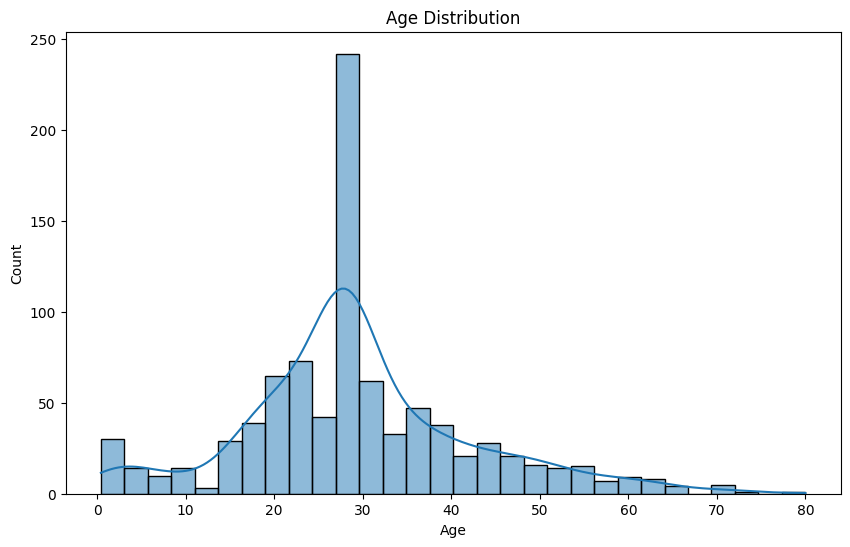

In [14]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sb.histplot(da['Age'], kde=True, palette='rocket')
plt.title('Age Distribution')
plt.show()

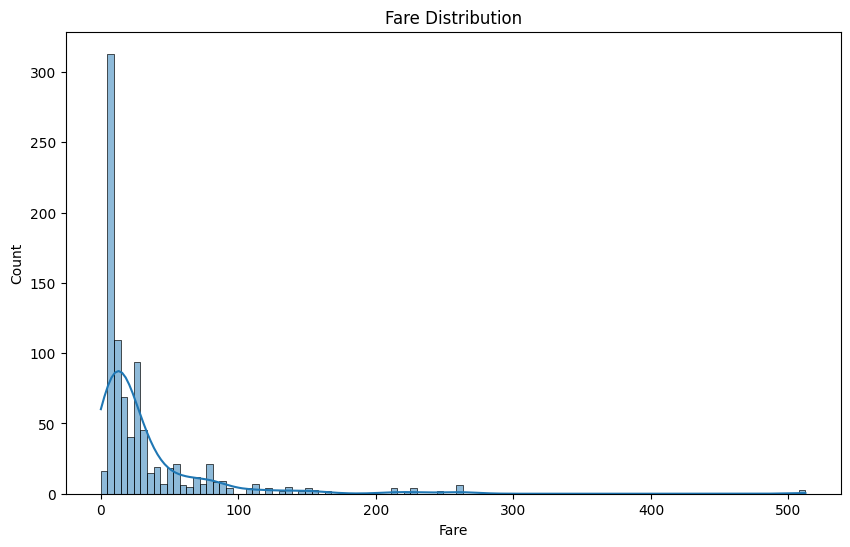

In [15]:
# Distribution of Fare
plt.figure(figsize=(10, 6))
sb.histplot(da['Fare'], kde=True, palette='rocket')
plt.title('Fare Distribution')
plt.show()

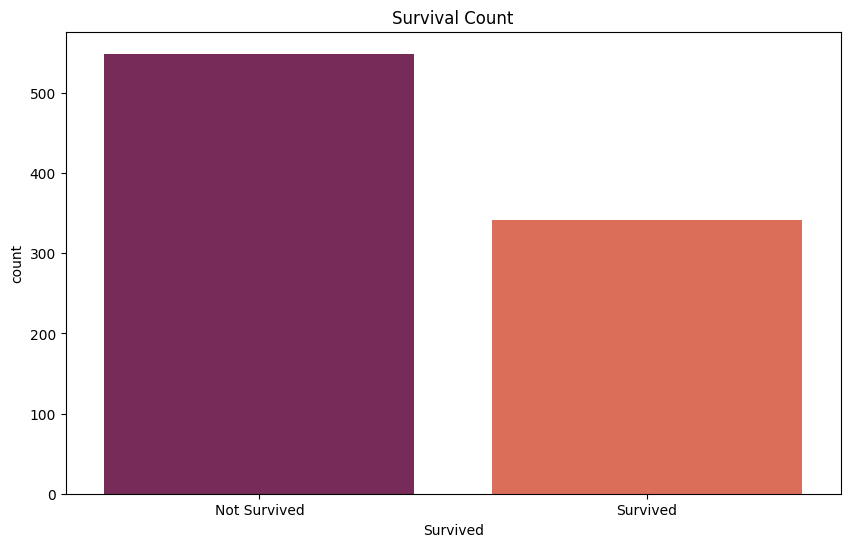

In [16]:
# Count plot of Survived
plt.figure(figsize=(10, 6))
sb.countplot(x='Survived', data=da, palette='rocket')
plt.title('Survival Count')
plt.xticks(ticks=[0,1],labels=['Not Survived','Survived'])
plt.show()

### Bivariate Analysis

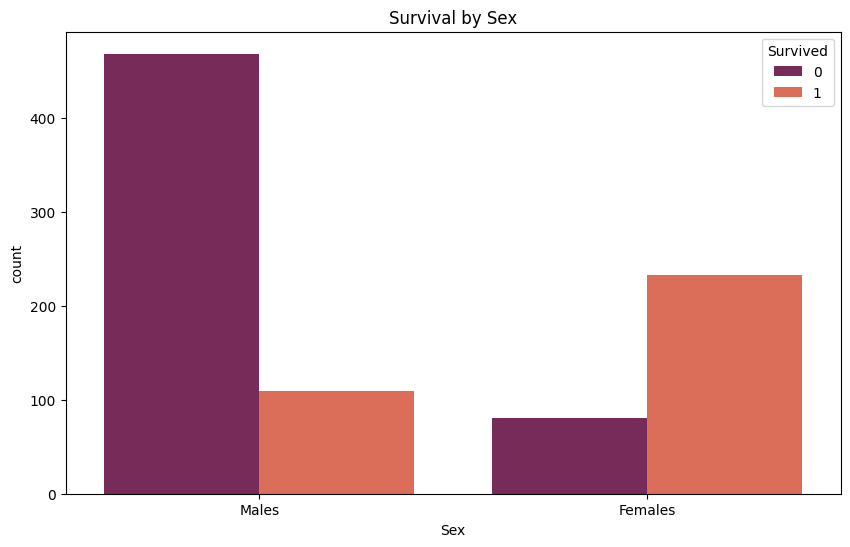

In [17]:
# Survival by Sex
plt.figure(figsize=(10, 6))
sb.countplot(x='Sex', hue='Survived', data=da, palette='rocket')
plt.title('Survival by Sex')
plt.xticks(ticks=[0,1],labels=['Males','Females'])
plt.show()

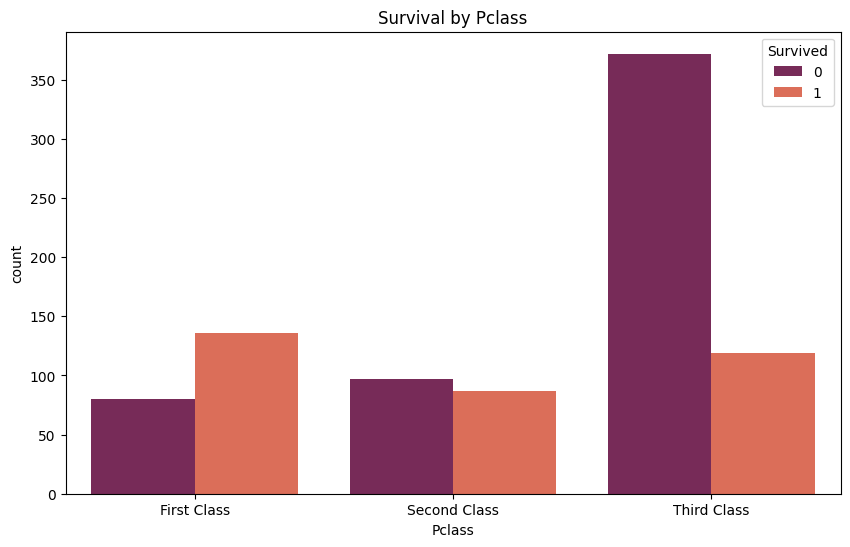

In [18]:
# Survival by Pclass
plt.figure(figsize=(10, 6))
sb.countplot(x='Pclass', hue='Survived', data=da, palette='rocket')
plt.title('Survival by Pclass')
plt.xticks(ticks=[0,1,2],labels=['First Class','Second Class','Third Class'])
plt.show()

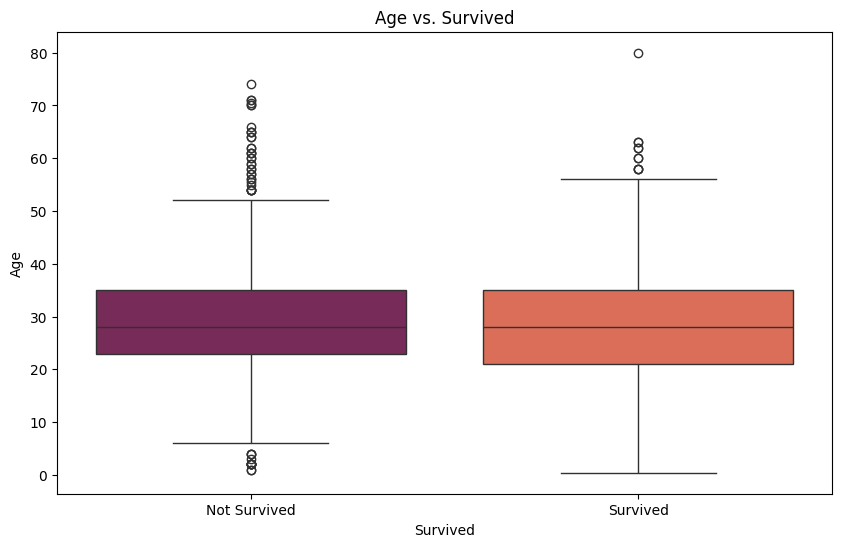

In [19]:
# Age vs. Survived
plt.figure(figsize=(10, 6))
sb.boxplot(x='Survived', y='Age', data=da, palette='rocket')
plt.title('Age vs. Survived')
plt.xticks(ticks=[0,1],labels=['Not Survived','Survived'])
plt.show()

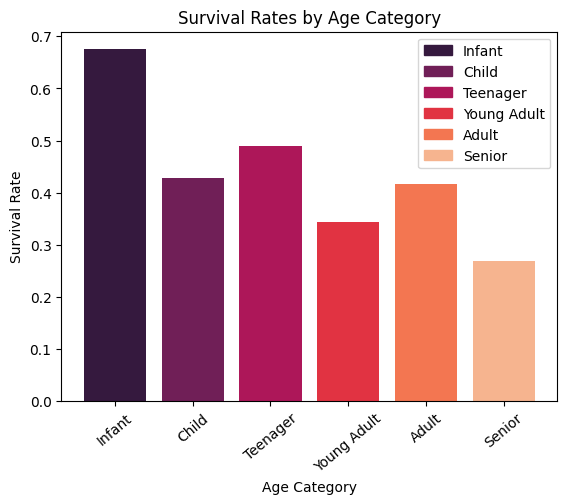

In [20]:
# Survival Rates by Age Category
cut_points = [0, 5, 12, 18, 35, 60, 100]
label_names = ['Infant', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
da['Age_categories'] = pa.cut(da['Age'], bins=cut_points, labels=label_names, right=False)
# Creating a pivot table for survival rates based on age categories
age_cat_pivot = da.pivot_table(index="Age_categories", values="Survived")

# Define colors using the seaborn "rocket" palette
colors = sb.color_palette("rocket", len(label_names))

# Plotting the bar chart with different colors for each bar
fig, ax = plt.subplots()
bars = ax.bar(age_cat_pivot.index, age_cat_pivot['Survived'], color=colors)

# Adding a legend with the specified colors
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(colors))]
ax.legend(handles, label_names)
ax.set_title('Survival Rates by Age Category')
ax.set_xlabel('Age Category')
ax.set_ylabel('Survival Rate')
plt.xticks(rotation=40)
plt.show()

### Multivariate Analysis

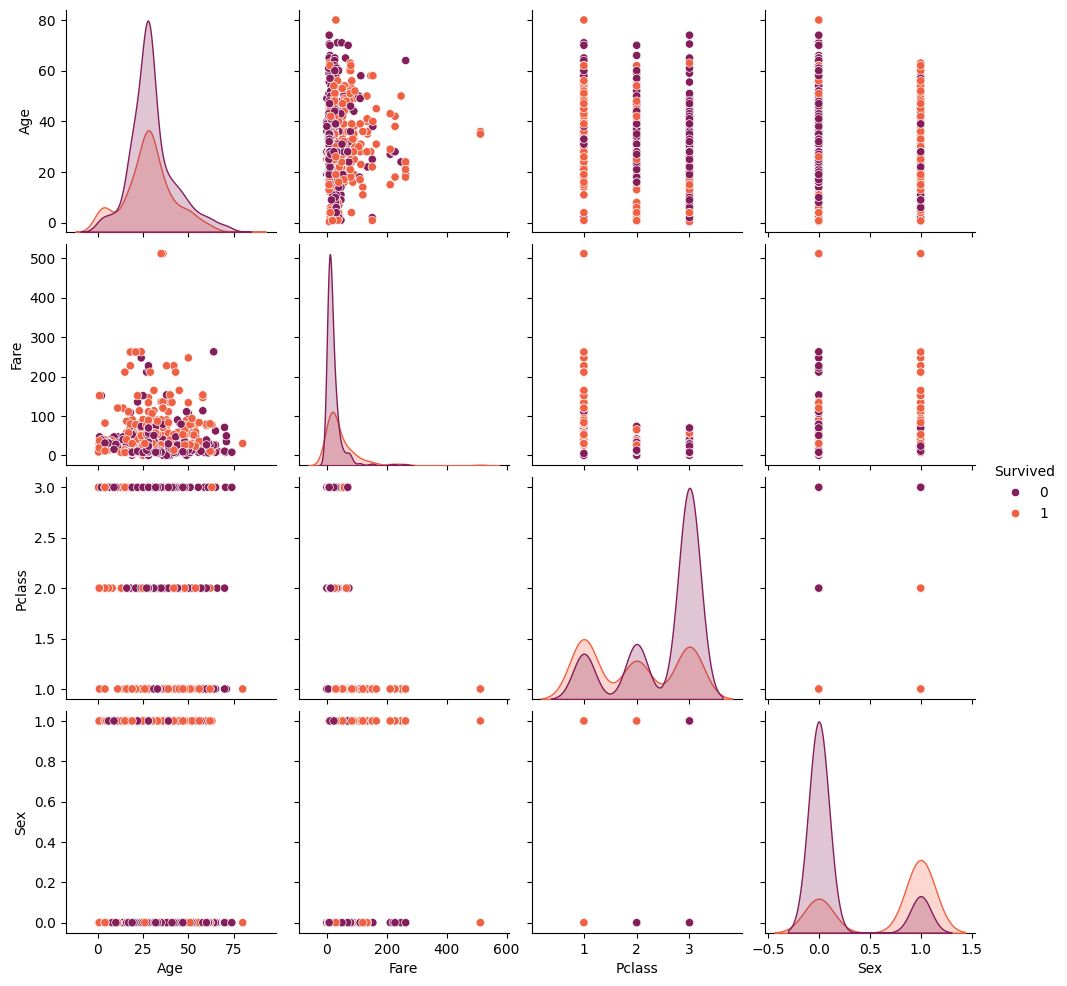

In [21]:
# Pairplot of multiple features
sb.pairplot(da[['Survived', 'Age', 'Fare', 'Pclass', 'Sex']], hue='Survived', palette='rocket')
plt.show()

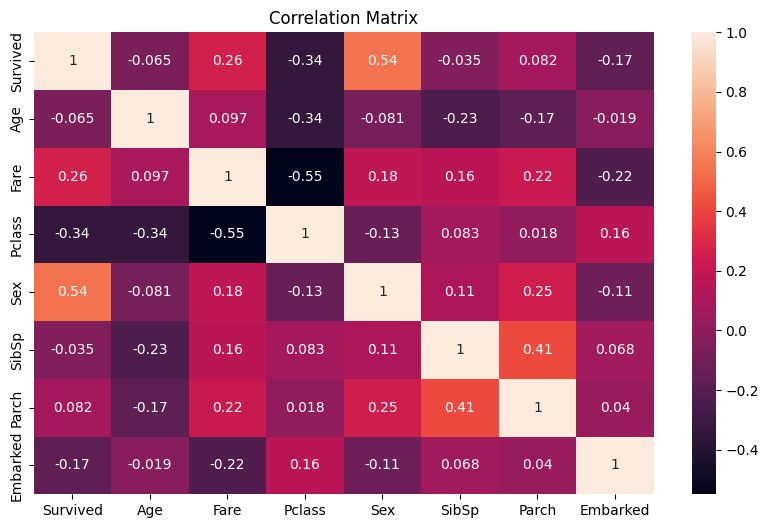

In [22]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sb.heatmap(da[['Survived', 'Age', 'Fare', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']].corr(), annot=True, cmap='rocket')
plt.title('Correlation Matrix')
plt.show()

## Conclusion
Based on the visualizations we've done so far, we can draw a few preliminary conclusions:

### Age and Fare Distributions:
The age distribution shows a wide range of ages among passengers, with a concentration around 20-40 years.
The fare distribution is right-skewed, indicating that most passengers paid lower fares, with a few paying significantly higher fares.

### Age and Survival Rates:
The overall survival rate was low, with more passengers not surviving than those who did.
Females & Children had a higher survival rate compared to males. This observation aligns with the "Women and Children first" protocol followed during the Titanic disaster, reflecting societal norms of the time prioritizing Women's and Children's safety.
Passengers in higher classes (1st class) had higher survival rates compared to those in lower classes (3rd class). This indicates a potential correlation between socio-economic status and survival, with passengers in higher classes likely having better access to lifeboats and other resources during the evacuation.